In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",200)
eda_datapath = ("C:\\Users\\saheb\\Downloads\\Global Terrorism - START data\\globalterrorismdb_0718dist.csv")
eda_df = pd.read_csv(eda_datapath, encoding='ISO-8859-1')
print(eda_df.head(10))

C:\Users\saheb\AppData\Local\Temp\ipykernel_7840\4271759612.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  eda_df = pd.read_csv(eda_datapath, encoding='ISO-8859-1')


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   
5  1.970010e+11   1970       1     1        NaN         0        NaN      217   
6  1.970010e+11   1970       1     2        NaN         0        NaN      218   
7  1.970010e+11   1970       1     2        NaN         0        NaN      217   
8  1.970010e+11   1970       1     2        NaN         0        NaN      217   
9  1.970010e+11   1970       1     3        NaN         0        NaN      217   

          country_txt  region                   region_txt   provstate  \
0  Dominican Republic       2  Cen

In [3]:
print(eda_df.sample(10))

             eventid  iyear  imonth  iday approxdate  extended  resolution  \
144555  2.015020e+11   2015       2    15        NaN         1         NaN   
141588  2.014120e+11   2014      12    15        NaN         0         NaN   
106842  2.012040e+11   2012       4     6        NaN         0         NaN   
29222   1.986090e+11   1986       9    25        NaN         0         NaN   
119402  2.013070e+11   2013       7    23        NaN         0         NaN   
144886  2.015020e+11   2015       2    24        NaN         0         NaN   
8931    1.979070e+11   1979       7    18        NaN         1  08-04-1979   
158923  2.016020e+11   2016       2    14        NaN         1         NaN   
109417  2.012070e+11   2012       7    17        NaN         0         NaN   
71652   2.001010e+11   2001       1     1        NaN         1  01-07-2001   

        country         country_txt  region                   region_txt  \
144555      228               Yemen      10   Middle East & North

In [4]:
print(eda_df.shape)

(181691, 135)


In [5]:
eda_df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
eda_df['Casualities'] = eda_df.Killed + eda_df.Wounded
eda_df=eda_df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
print(eda_df.head(10))

   Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   
5  1970      1    1       United States                North America   
6  1970      1    2             Uruguay                South America   
7  1970      1    2       United States                North America   
8  1970      1    2       United States                North America   
9  1970      1    3       United States                North America   

            City   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Takin

In [6]:
print(eda_df.columns)

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')


In [7]:
print(eda_df.isnull().sum())

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64


In [8]:
print(eda_df.shape)

(181691, 16)


In [9]:
eda_df.dropna(axis=0,inplace=True)
print(eda_df.shape)

(159946, 16)


In [10]:
print(eda_df.isnull().sum())

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64


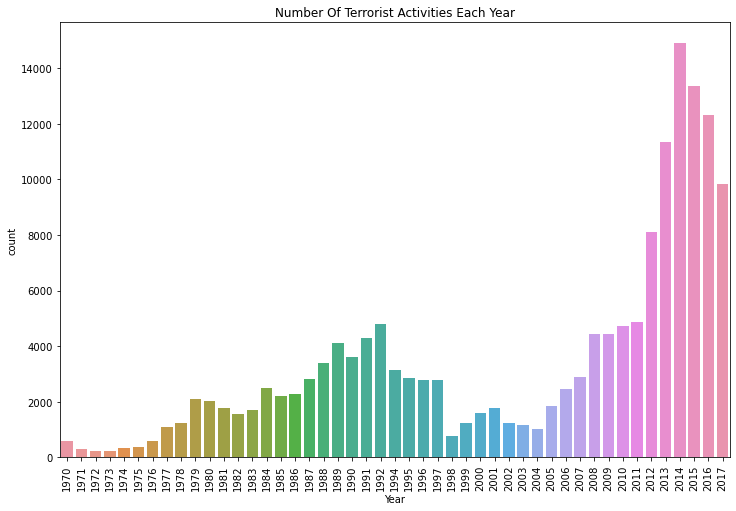

In [11]:
#Yearly Count of Terrorist Attack-
plt.figure(figsize=(12,8))
sns.countplot(x="Year", data=eda_df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

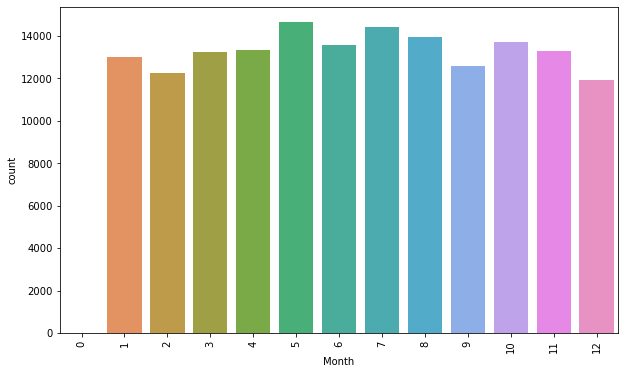

In [12]:
#month analysis
eda_df['Month'].value_counts()
plt.figure(figsize = (10, 6))
sns.countplot(x='Month', data = eda_df)
plt.xticks(rotation=90)
plt.show()

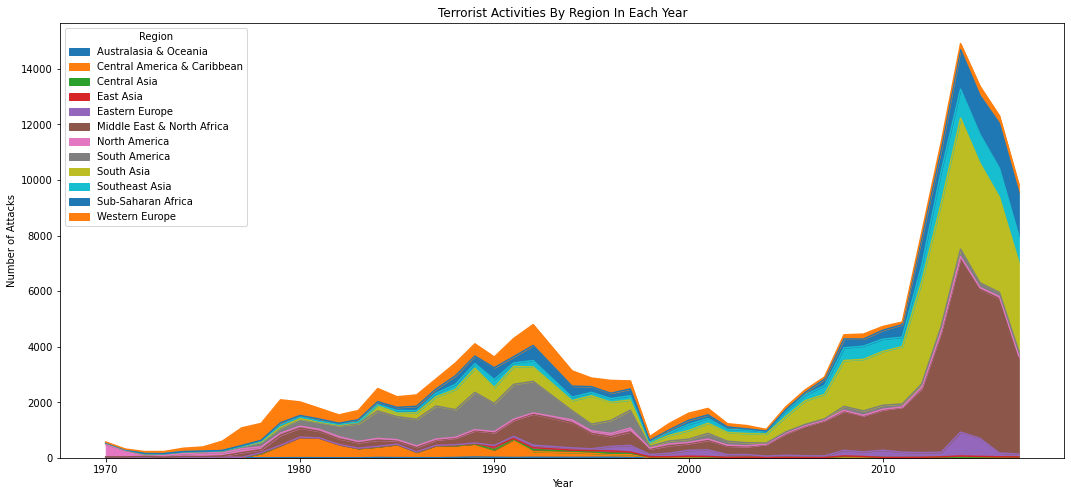

In [13]:
#Terrorist Activities By Region In Each Year
pd.crosstab(eda_df.Year, eda_df.Region).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [14]:
eda_df['Wounded'] = eda_df['Wounded'].fillna(0).astype(int)
eda_df['Killed'] = eda_df['Killed'].fillna(0).astype(int)
eda_df['casualities'] = eda_df['Killed'] + eda_df['Wounded']
     

terror1 = eda_df.sort_values(by='casualities',ascending=False)[:40]
     

heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
     

print(heat.head(10))

Year          1982  1984   1987   1992   1994    1995  1996  1997    1998  \
Country                                                                     
Afghanistan    0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
Chad           0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
Ethiopia       0.0   0.0    0.0  500.0    0.0     0.0   0.0   0.0     0.0   
France         0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
India          0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
Iran         760.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
Iraq           0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0     0.0   
Japan          0.0   0.0    0.0    0.0  507.0  3092.0   0.0   0.0     0.0   
Kenya          0.0   0.0    0.0    0.0    0.0     0.0   0.0   0.0  4224.0   
Mozambique     0.0   0.0  458.0    0.0    0.0     0.0   0.0   0.0     0.0   

Year         2001  2004   2005    2006        2007    2008   2009   2014  \

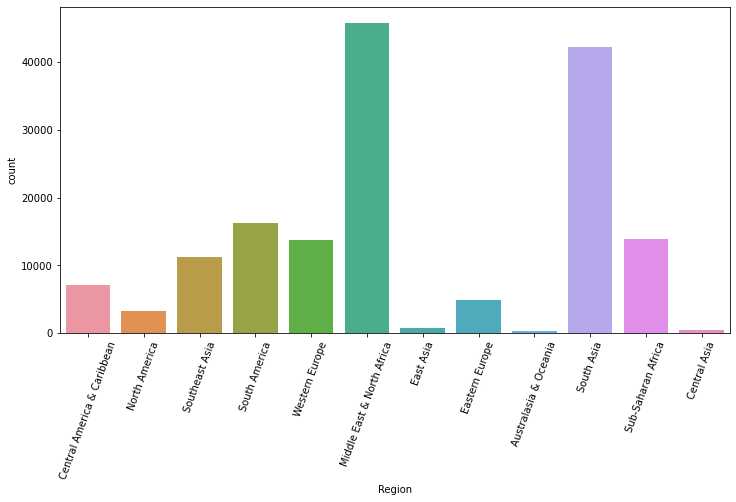

In [15]:
#REGION AFFECTED BY TERRORIST ATTACK
eda_df['Region'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='Region',data=eda_df)
plt.xticks(rotation=70)
plt.show()